In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned.head()

,category_id,comments_disabled,ratings_disabled,video_error_or_removed,region,timetotrend,hour,tag_counts,log_views,log_likes,log_dislikes,log_comments
0,28,0,0,0,Great Britan,7,16,14,13.407891,8.777247,6.570883,7.822845
1,25,0,0,0,Great Britan,7,17,44,10.871175,6.912743,3.931826,4.882802
2,22,0,0,0,Great Britan,12,20,6,12.983917,8.515992,5.204007,5.278115
3,22,0,0,0,Great Britan,3,7,27,13.478176,8.599326,7.863651,8.277158
4,22,0,0,0,Great Britan,8,16,16,10.732607,7.580700,3.555348,4.859812


In [3]:
#All distinct regions
countries = data_cleaned['region'].unique()
countries 

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

In [4]:
pd.options.display.float_format = '{:.2f}'.format

# LINEAR REGRESSION MODEL (GLOBAL)

### Declare the inputs & target

In [5]:
# The target(s) (dependent variable) is 'log_views'
targets = data_cleaned['log_views']

# The inputs are everything BUT the dependent variable & 'region', so we can simply drop it
inputs = data_cleaned.drop(['log_views' , 'region'],axis=1)

### Scale the data

In [6]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [7]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split everytime, random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the Regression

In [8]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Storing the outputs(the predictions) of the regression 
y_hat = reg.predict(x_train)

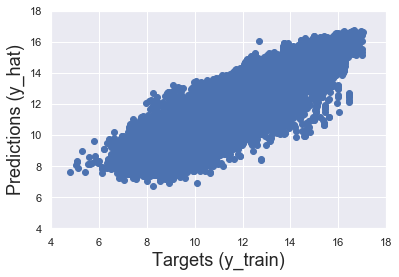

In [10]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

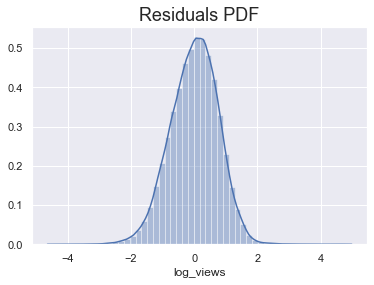

In [11]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed

### Summary , Weights & Bias

In [12]:
x1=sm.add_constant(x_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 1.036e+05
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        15:06:59   Log-Likelihood:            -2.4128e+05
No. Observations:              211925   AIC:                         4.826e+05
Df Residuals:                  211916   BIC:                         4.827e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5969      0.002   7066.466      0.000      11.594      11.600
x1            -0.0528      0.002    -31.674      0.000      -0.056      -0.050
x2          5.982e-17   4.16e-19    143.872      0.000     5.9e-17    6.06e-17
x3         -1.094e-16   1.61e-18    -67.853      0.000   -1.13e-16   -1.06e-16
x4             0.0070      0.002      4.157      0.000       0.004       0.010
x5             0.1861      0.002    100.875      0.000       0.182       0.190
x6            -0.0809      0.002    -49.034      0.000      -0.084      -0.078
x7             0.0128      0.002      7.657      0.000       0.010       0.016
x8             0.5223      0.004    147.852      0.000       0.515       0.529
x9             1.0099      0.003    362.590      0.000       1.004       1.015
x10           -0.0620      0.003    -17.714      0.000      -0.069      -0.055
==============================================================================
Omnibus:                     2376.235   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3023.041
Skew:                          -0.179   Prob(JB):                         0.00
Kurtosis:                       3.463   Cond. No.                     2.77e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### OBSERVATION
R-squared(=0.796) measures the proportion of the variation in your dependent variable (Y) explained by your independent variables (X) for a linear regression model.

In [13]:
# Obtain the bias (intercept) of the regression
reg.intercept_

11.596901268680455

In [14]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-5.28070425e-02, -3.33066907e-16, -1.11022302e-16,  6.96087418e-03,
        1.86112128e-01, -8.08694186e-02,  1.27811587e-02,  5.22311628e-01,
        1.00988879e+00, -6.19888221e-02])

In [15]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_ # Weights - Regression Coefficients
reg_summary

,Features,Weights
0,category_id,-0.05
1,comments_disabled,-0.00
2,ratings_disabled,-0.00
3,video_error_or_removed,0.01
4,timetotrend,0.19
5,hour,-0.08
6,tag_counts,0.01
7,log_likes,0.52
8,log_dislikes,1.01
9,log_comments,-0.06


#### OBSERVATION
1. Higher the absolute value of weight(regression coefficient) of a feature , higher is its influence on the target.
2. Dislikes has a high influence.

### TESTING

In [16]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# If the predictions are far off, we will know that our model overfitted

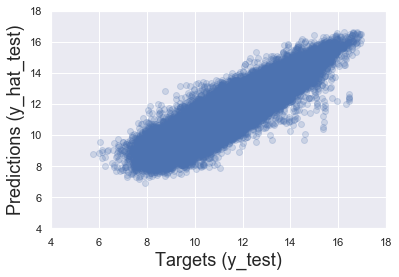

In [17]:
y_hat_test = reg.predict(x_test) #testing

# Create a scatter plot with the test targets and the test predictions
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(4,18)
plt.ylim(4,18)
plt.show()

In [18]:
# Finally, let's manually check these predictions
# To obtain the actual views, we take the exponential of the log_views
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

#reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

#we need the exponential of the test log views
df_pf['Target'] = np.exp(y_test)

# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,77644.30,293447.00,215802.70,73.54
1,260251.80,130944.00,-129307.80,98.75
2,1193231.96,987475.00,-205756.96,20.84
3,18496.56,4338.00,-14158.56,326.38
4,143068.02,287989.00,144920.98,50.32


Text(0.5, 1.0, 'Residuals PDF')

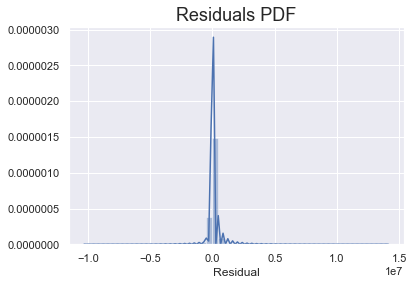

In [19]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(df_pf['Residual'])

# Include a title
plt.title("Residuals PDF", size=18)

In [20]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,52982.00,52982.00,52982.00,52982.00
mean,334294.84,392822.45,58527.61,76.49
std,813133.56,996238.06,540549.50,124.40
min,1019.16,315.00,-10297755.60,0.00
25%,38196.92,34973.00,-31592.05,23.90
50%,108752.59,111775.50,1291.86,46.71
75%,293620.99,348503.00,72145.78,75.37
max,16987509.99,22963240.00,14112393.44,5652.28


#### OBSERVATION
1. 50% of the predicted values differ by 46.71% of the actual values
2. Minimum difference in actual & predicted is 0%.
3. Maximum difference in actual & predicted is 5652.28%. 

# Comparison of Regression Coefficients of Country-Wise Linear Regression

In [21]:
data_cleaned = data_cleaned.drop(['ratings_disabled' , 'comments_disabled' , 'tag_counts' , 'video_error_or_removed'],axis=1)

In [22]:
intercept=[]
coeff_likes=[]
coeff_dislikes=[]
coeff_categoryid=[]
coeff_timetotrend=[]
coeff_hour=[]
coeff_tagcounts=[]
coeff_comments=[]

def linear_regression(select):
    #Initializing data
    targets = select['log_views']
    inputs = select.drop(['log_views' , 'region'],axis=1)
    
    #Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit(inputs_scaled,targets)
    
    intercept.append(reg.intercept_)
    coeff_categoryid.append(reg.coef_[0])
    coeff_timetotrend.append(reg.coef_[1])
    coeff_hour.append(reg.coef_[2])
    coeff_likes.append(reg.coef_[3])
    coeff_dislikes.append(reg.coef_[4])
    coeff_comments.append(reg.coef_[5])

In [23]:
for i in countries:
    select = data_cleaned.loc[data_cleaned['region']==i] #Selects all rows of a particular country
    linear_regression(select)

In [24]:
def Compare(l,l_name):
    
    K=[]
    for i in range(0,len(countries)):
        K.append(i)
        
    plt.plot(K,l)
    plt.xlabel('Countries',fontsize=15)
    plt.ylabel(l_name,fontsize=15)
    plt.title('Country-Wise ' + l_name ,fontsize=20)
    plt.xticks(K,countries,rotation=30, horizontalalignment='right')
    plt.show()

In [25]:
plt.rc('figure', figsize=(6, 3), dpi=100)

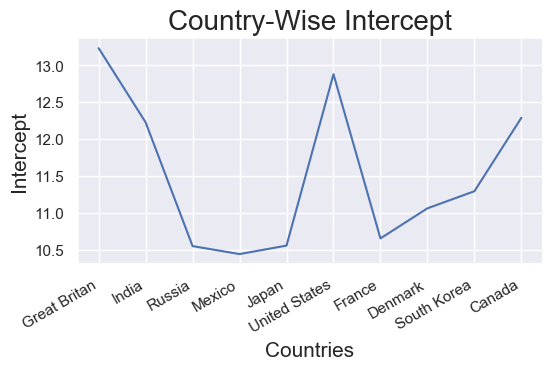

In [26]:
Compare(intercept,'Intercept')

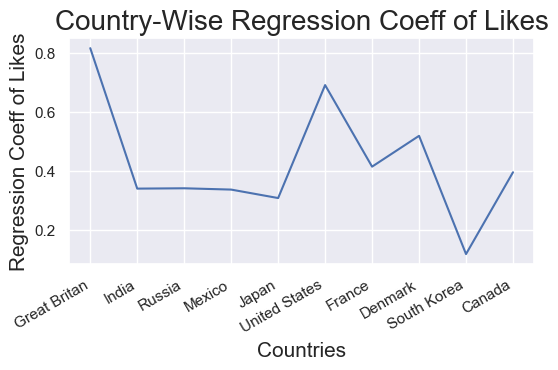

In [27]:
Compare(coeff_likes,'Regression Coeff of Likes')

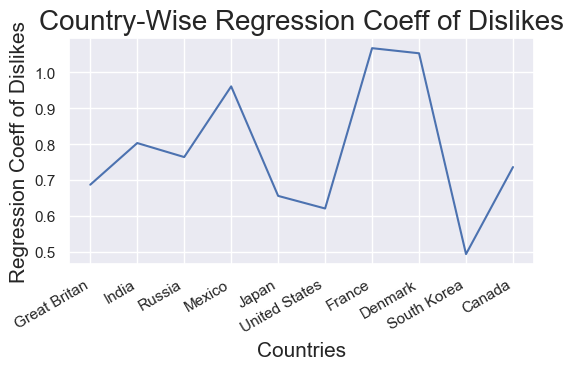

In [28]:
Compare(coeff_dislikes,'Regression Coeff of Dislikes')

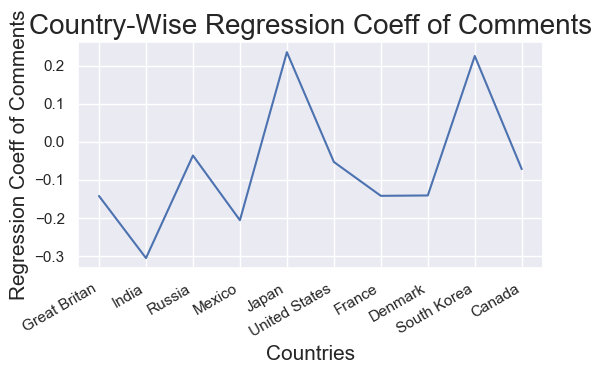

In [29]:
Compare(coeff_comments,'Regression Coeff of Comments')

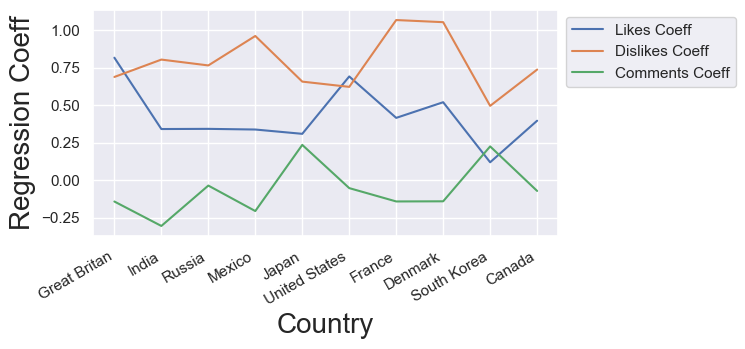

In [30]:
K=[]
for i in range(0,len(countries)):
    K.append(i)
plt.plot(K,coeff_likes, label = "Likes Coeff")
plt.plot(K,coeff_dislikes,label= "Dislikes Coeff")
plt.plot(K,coeff_comments,label= "Comments Coeff")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Regression Coeff',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

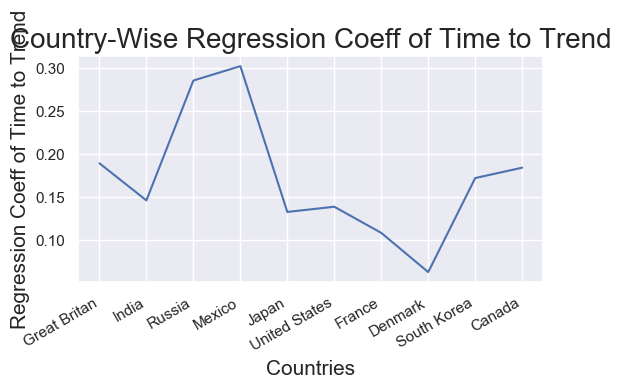

In [31]:
Compare(coeff_timetotrend,'Regression Coeff of Time to Trend')

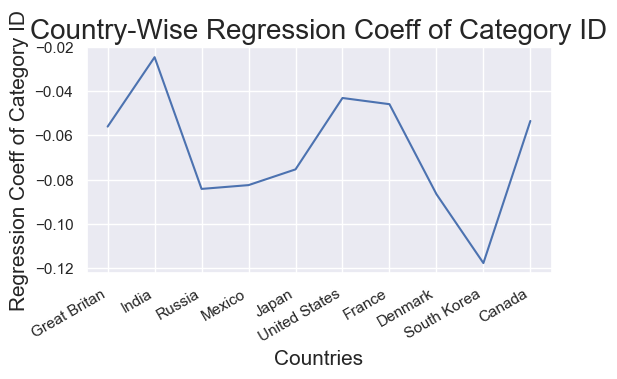

In [32]:
Compare(coeff_categoryid,'Regression Coeff of Category ID')

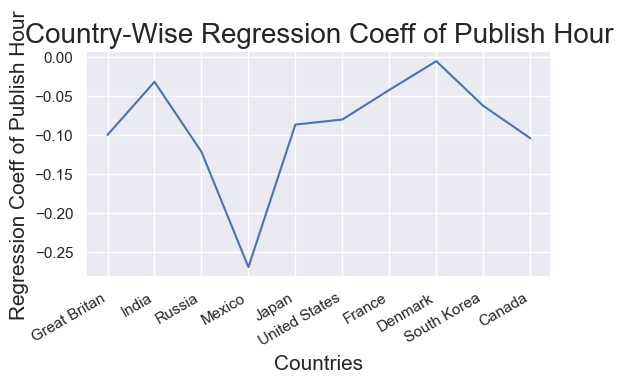

In [33]:
Compare(coeff_hour,'Regression Coeff of Publish Hour')

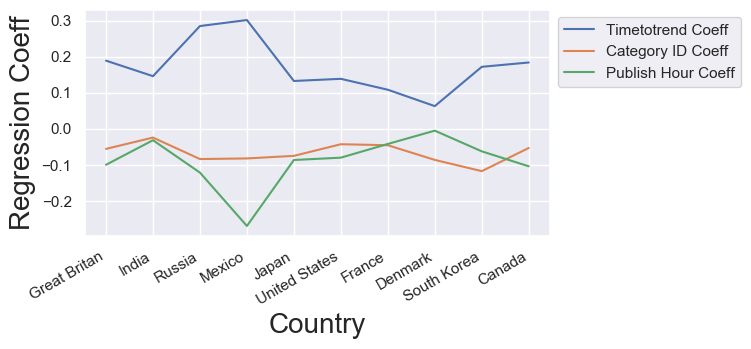

In [34]:
plt.plot(K,coeff_timetotrend, label = "Timetotrend Coeff")
plt.plot(K,coeff_categoryid,label= "Category ID Coeff")
plt.plot(K,coeff_hour,label= "Publish Hour Coeff")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Regression Coeff',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# CONFIG

In [35]:
config = [ [50,50] , [60,40], [70,30], [80,20] , [90,10] ]

In [36]:
from sklearn import metrics

In [37]:
mean_absolute = []
mean_squared = []
root_mean_squared = []
def config_test(c):
    testsize = c/100
    
    #Dummy variables for region
    data_config = pd.get_dummies(data_cleaned, drop_first=True)
    
    #Initializing data
    targets = data_config['log_views']
    inputs = data_config.drop(['log_views'],axis=1)
    
    #Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    
    #TrainTestSplit
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=c, random_state=365)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit( x_train,y_train)
    
    predicted = reg.predict(x_test)
      
    mean_absolute.append( metrics.mean_absolute_error(y_test, predicted))
    mean_squared.append(metrics.mean_squared_error(y_test, predicted))
    root_mean_squared.append(np.sqrt(metrics.mean_squared_error(y_test,predicted)))

In [38]:
for i in config:
    config_test(i[1])

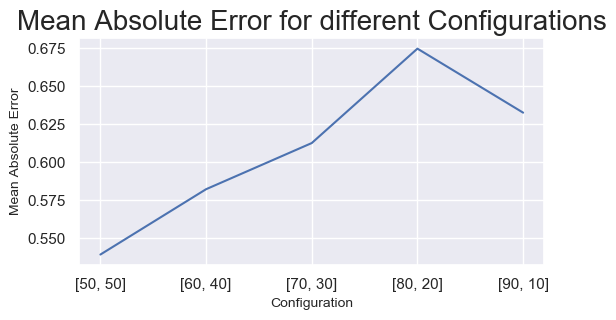

In [39]:
K = [1,2,3,4,5]
plt.plot(K,mean_absolute)
plt.xlabel('Configuration' , fontsize=10)
plt.ylabel('Mean Absolute Error',fontsize=10)
plt.title('Mean Absolute Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

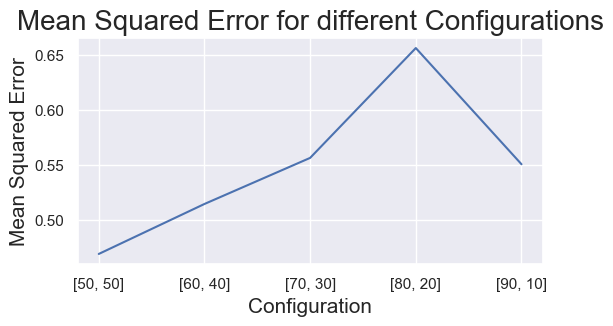

In [40]:
K = [1,2,3,4,5]
plt.plot(K,mean_squared)
plt.xlabel('Configuration' , fontsize=15)
plt.ylabel('Mean Squared Error',fontsize=15)
plt.title('Mean Squared Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

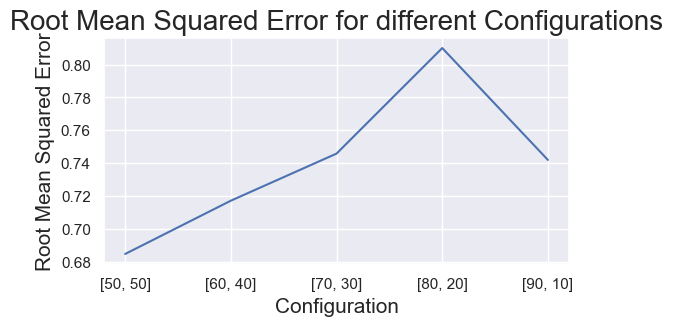

In [41]:
K = [1,2,3,4,5]
plt.plot(K,root_mean_squared)
plt.xlabel('Configuration' , fontsize=15)
plt.ylabel('Root Mean Squared Error',fontsize=15)
plt.title('Root Mean Squared Error for different Configurations',fontsize=20)
plt.xticks(K,config)
plt.show()

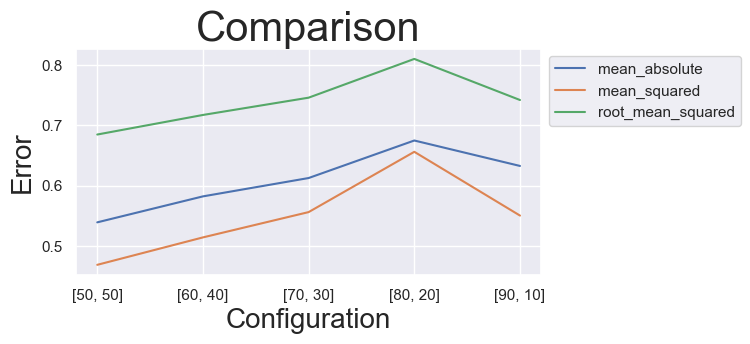

In [42]:
plt.plot(K,mean_absolute, label = "mean_absolute")
plt.plot(K,mean_squared,label= "mean_squared")
plt.plot(K,root_mean_squared,label= "root_mean_squared")
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.title("Comparison",fontsize=30)
plt.xticks(K,config)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()